# SVM
- 선형 svm
    - 직선을 투영하는 방식

- 비선형 svm ( 커널 svm )
    - 일반적인 svm
    
SV(support vector)를 훈련 시에 데이터 포인트로부터 선정, 서포트벡터의 개수와 범위를 지정하면서 복잡도를 조절한다.

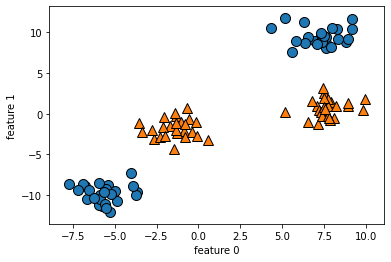

In [4]:
from sklearn.datasets import make_blobs
import mglearn
import matplotlib.pyplot as plt

x,y = make_blobs(centers=4,random_state=8)
y = y%2

mglearn.discrete_scatter(x[:,0],x[:,1],y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.show()

C:\Users\DIAMOND\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


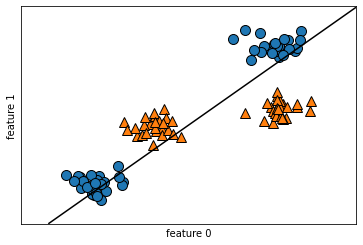

In [5]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(x,y)

mglearn.plots.plot_2d_separator(linear_svm,x)
mglearn.discrete_scatter(x[:,0],x[:,1],y)

plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.show()

커널 svm
- 수학적 기교를 사용하는 것이 아니라 커널 트릭( kernel trick )을 이용하는 방식
- RBF (radial basis function) : 가우시안 커널

커널 svm이 훈련하면서 하는 일들
- svm 모델이 배우는 것 : 훈련 데이터 포인트가 두 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 배운다
- 훈련 데이터의 일부만 결정 경계를 만드는데 영향을 미친다.
- 이 데이터 포인트를 서포트 벡터 라고 한다.

svm의 하이퍼 파라미터

- gamma 
    - 가우시안 커널폭의 역수
    - gamma 매개변수가 하나의 훈련 샘플에 미치는 영향의 범위를 설정
    - gamma가 커지면 복잡도가 올라감
    - 연관성 있는 데이터 포이트 끼리의 모임을 만든다.
    
- C
    - 서포트 벡터 선정에 영향을 미치는 규제 매개변수
    - 각 데이터 포인트의 중요도 값을 제한한다.
    - 서포트 벡터 == 포인트 중요도
    - 포인트 중요도 : 서포트 벡터로써, 결정 경계를 구성하는데 어떠한 역할을 하는지
    
SVM 알고리즘 중에서 가장 성능이 괜찮고 일반적으로 널리 사용되는 것은 RBF 커널 SVM이고, 좋은 성능을 얻으려면 매개변수인 C와 gamma를 잘 조정해줘야 한다. C는 데이터 샘플들이 다른 클래스에 놓이는 것을 허용하는 정도를 결정하고, gamma는 결정 경계의 곡률을 결정한다. 두 값 모두 커질수록 알고리즘의 복잡도는 증가하고, 작아질수록 복잡도는 낮아진다. 일반적으로 grid search로 경험적으로 최적의 매개변수 값들을 찾아가는데, 이상 설명한 내용을 어느 정도 숙지하고 있다면 훨씬 더 빠르게 좋은 성능을 내는 매개변수 값들을 찾아낼 수 있을 것이다. 

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

cancer = load_breast_cancer()

x_train,x_test,y_train,y_test = train_test_split(cancer.data,
                                                cancer.target,
                                                random_state=0)

svc = SVC()
svc.fit(x_train,y_train)

print('훈련 세트 정확도 : {:.2f}'.format(svc.score(x_train,y_train)))
print('테스트 세트 정확도 : {:.2f}'.format(svc.score(x_test,y_test)))

훈련 세트 정확도 : 0.90
테스트 세트 정확도 : 0.94
